In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

font = {'family': 'Arial', 'size': 20}
mpl.rc('font', **font)

In [3]:
# HPA data import
df_HPA_all = pd.read_excel('./SourceData/HPA/aal3321_thul_sm_table_s6.xlsx')
print(df_HPA_all.columns)

Index(['ENSG', 'Gene', 'Uniprot', 'Nucleus', 'Nucleoplasm', 'Nuclear bodies',
       'Nuclear speckles', 'Nuclear membrane', 'Nucleoli',
       'Nucleoli (Fibrillar center)', 'Cytosol', 'Cytoplasmic bodies',
       'Rods and Rings', 'Lipid droplets', 'Aggresome', 'Mitochondria',
       'Microtubules', 'Microtubule ends', 'Microtubule organizing center',
       'Centrosome', 'Mitotic spindle', 'Cytokinetic bridge', 'Midbody',
       'Midbody ring', 'Intermediate filaments', 'Actin filaments',
       'Focal Adhesions', 'Endoplasmic reticulum', 'Golgi apparatus',
       'Vesicles', 'Plasma membrane', 'Cell Junctions', 'Reliability',
       'IF location score', 'IF main protein location',
       'IF additional protein location', 'HyperLOPIT location'],
      dtype='object')


In [4]:
# Select necessary columns
df_HPA_all = df_HPA_all[['Gene', 'Uniprot','Reliability','IF location score' ]]

Text(0.5, 1.0, 'HPA localization reliablity')

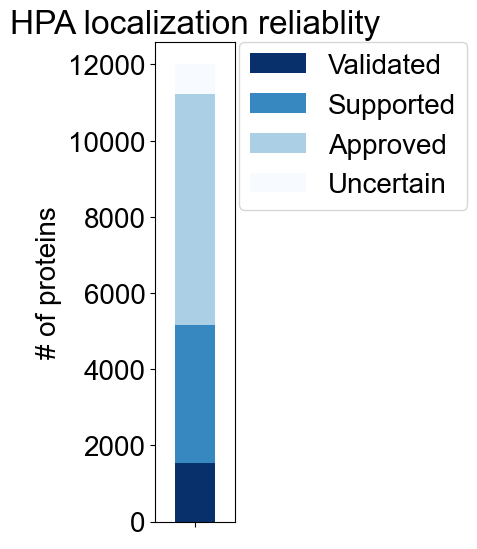

In [5]:
# Graph subcellular loc data reliability
category_reliability = ['Validated', 'Supported', 'Approved', 'Uncertain']

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# make a dataframe for plotting
df = pd.DataFrame()
for category in category_reliability:
    df.loc[" ", category] = len(df_HPA_all[df_HPA_all['Reliability'] == category])
    
# plot
df.plot(kind='bar', ax=ax, stacked=True, figsize=(1,6), colormap="Blues_r")
plt.ylabel('# of proteins')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('HPA localization reliablity')

In [6]:
# Keep only "validated" or "supported"
df_HPA_VorS = df_HPA_all[(df_HPA_all['Reliability'] == 'Validated')|(df_HPA_all['Reliability'] == 'Supported')]

In [7]:
# Among them, nuclear proteins or not
df_HPA_VorS_Nuc = df_HPA_VorS[df_HPA_VorS['IF location score'].str.contains('Nucle')]
df_HPA_VorS_non_Nuc = df_HPA_VorS[~df_HPA_VorS['IF location score'].str.contains('Nucle')]

print("Number of nuclear proteins in validated or supproted is ", len(df_HPA_VorS_Nuc))
print("Number of non-nuclear proteins in validated or supproted is ", len(df_HPA_VorS_non_Nuc))

Number of nuclear proteins in validated or supproted is  3077
Number of non-nuclear proteins in validated or supproted is  2071


In [9]:
# Export
df_HPA_VorS_Nuc.to_csv('./Output/HPA_val_supp_nucleus.csv', index=False)
df_HPA_VorS_Nuc.to_csv('./Output/HPA_val_supp_non-nuleus.csv', index=False)